## Homework 4

## <em> Fisher Information Matrix, Independent Component Analysis</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***

#### Problem 1 - Constraining the cosmological parameters using the Planck power spectrum

<i>Planck</i> is the third-generation space telescope, following COBE and WMAP, and it aims to determine the geometry and content of the Universe by observing the cosmic microwave background radiation (CMB), emitted around 380,000 years after the Big Bang. Permeating the whole universe and containing information on the properties of the early Universe, the CMB is widely known as the strongest evidence for the Big Bang model. <br><br>
Measuring the spectrum of the CMB, we confirm that it is very close to the radiation from an ideal blackbody, and flunctuations in the spectrum are very small. Averaging ocer all locations, its mean temperature is $2.725K$, and its root mean square temperature fluctuation is $\langle(\frac{\delta T}{T})^2\rangle^{1/2} = 1.1 \times 10^{-5}$ (i.e. the temperature of the CMB varies by only ~ 30 $\mu K$ across the sky). <br>
![alt text](https://drive.google.com/uc?id=1A8Bgw2WaLiRvNQXvUf3X0tKS5QirY7ZK)
<br>
Suppose you observe the fluctuations $\delta T/T$. Since we are taking measurements on the surface of a sphere, it is useful to expand $\delta T/T$ in spherical harmonics (because they form a complete set of orthogonal functions on the sphere):<br>
$$ \frac{\delta T}{T} (\theta, \phi) = \sum_{l = 0}^{\infty} \sum_{m = -l}^{l} \mathrm{a}_{lm} \mathrm{Y}_{lm} (\theta, \phi) $$
<br>
In flat space, we can do a Fourier transform of a function $f(x)$ as $\sum_k \mathrm{a}_k \mathrm{e}^{ikx}$ where $k$ is the wavenumber, and $|\mathrm{a}_k|$ determines the amplitude of the mode. For spherical harmonics, instead of $k$, we have $l$, the number of the modes along a meridian, and $m$, the number of modes along the equator. So $l$ and $m$ determine the wavelength ($\lambda = 2\pi/l$) and shape of the mode, respectively.
<br><br>
In cosmology, we are mostly interested in learning the statistical properties of this map and how different physical effects influence different physical scales, so it is useful to define the correlation function $C(\theta)$ and split the CMB map into different scales.
<br><br>
Suppose that we observe $\delta T/T$ at two different points on the sky. Relative to an observer, they are in direction $\hat{n}$ and $\hat{n}'$ and are separated by an angle $\theta$ given by $cos\theta = \hat{n} \cdot \hat{n}'$ Then, we can find the correlation function by multiplying together the values of $\delta T/T$ at the two points and average the product over all points separated by the angle $\theta$.
$$ C(\theta)^{TT} =  \Big\langle \frac{\delta T}{T}(\hat{n})\frac{\delta T}{T}(\hat{n}') \Big\rangle_{\hat{n} \cdot \hat{n}' = cos\theta}$$
<br><br>
The above expression is specific to the temperature fluctuations, but we can also do a similar analysis for the polarization map of the CMB. (The CMB is polarized because it was scattered off of free electrons during decoupling.) We decompose the polarization pattern in the sky into a curl-free "E-mode" and grad-free "B-mode."
<br><br>
However, the CMB measurements (limited by the experiment resolution and the patch of sky examined) tell us about $C(\theta)$ over only a limited range of angular scales. (i.e. the precise values of $C(\theta)$ for all angles from $\theta = 0$ to $\theta = 180^\circ$ is not known.) Hence, using the expansion of $\delta T/T$ in spherical harmonics, we write the correlation function as:
$$ C(\theta) = \frac{1}{4\pi}\sum_{l=0}^\infty (2l+1) C_l P_l(cos\theta) $$
where $P_l$ are the Legendre polynomials.
<br><br>
So we break down the correlation function into its multipole moments $C_l$, which is the angular power spectrum of the CMB.
![alt text](https://drive.google.com/uc?id=1zyduy-DE7U8zRJYW8ZMcMPO54STq_3M1)
<br><br>
Remember that $\lambda = 2\pi/l$. So $C_l$ measures the amplitude as a function of wavelength. ($C_l = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}|^2$). In this problem, we will consider the temperature power spectrum $C_l^{TT}$, the E-mode power spectrum $C_l^{EE} = \frac{1}{2l+1}\sum_{m = -l}^l |\mathrm{a}_{lm}^E|^2$, and the temperature-polarization cross-correlation $C_l^{TE} = \frac{1}{2l+1}\sum_{m = -l}^l \mathrm{a}_{lm}^{T*} \mathrm{a}_{lm}^E$.
<br><br>
THe CMB angular power spectrum is usually expressed in terms of $D_l = l(l+1)C_l/2\pi$ (in unit of $\mu K^2$) because this better shows the contribution toward the variance of the temperature fluctuations.
<br><br>
Cosmologists built a software called "cosmological boltzmann code" which computes the theoretical power spectrum given cosmological parameters, such as the Hubble constant and the baryon density. Therefore, we can fit the theory power spectrum to the measured one in order to obtain the best-fit parameters.
<br><br>
Here, we consider six selected cosmological parameters, $\vec{\theta} = [\theta_1, \theta_2, ..., \theta_6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau]$. ($H_0$ = Hubble constant, $\Omega_b h^2$ = physical baryon density parameter, $\Omega_c h^2$ = physical cold dark matter density parameter, $n_s$ = scalar spectral index, $A_s$ = curvature fluctuation amplitude, $\tau$ = reionization optical depth.). We provide you with the measured CMB power spectra from Planck Data Release 2.
<br><br>
<i>References</i> :
<br>
http://carina.fcaglp.unlp.edu.ar/extragalactica/Bibliografia/Ryden_IntroCosmo.pdf (Chapter 9, Intro to Cosmology, Barbara Ryden)


***

#### Fisher prediction for future CMB surveys

In class, we learned that the Fisher information matrix is useful for designing an experiment; we can vary the experiment design and predict the level of the expected error on any given parameter. In this problem, we aim to determine how well a low-noise, high-resolution future CMB survey would do in constraining the cosmological parameters.
<br><br>
The Fisher matrix is defined as the ensemble average of the Hessian of the log-likelihood ($\ln\mathcal{L}$) with respect to the given parameters $\vec{\theta}$:
<br><br>
$$ F_{ij} = -\left\langle\frac{\partial^{2}\ln\mathcal{L}}{\partial\theta_i\ \partial\theta_j}\right\rangle $$
<br><br>
Here we take the model CMB power spectrum as our observables. (Here we consider the auto-correlations $D_l^{TT}, D_l^{EE}$ and cross-correlation $D_l^{TE}$ obtained from the boltzmann code using the best-fit cosmological parameters from Planck, https://arxiv.org/pdf/1502.01589v3.pdf.) Then, we can estimate the Fisher matrix between two parameters $\theta_i$ and $\theta_j$ as:
<br><br>
$$ F_{ij} = \sum_{l} \sum_{k}\frac{1}{(\sigma_l^k)^2}\frac{\partial D^{k}_{\ell}}{\partial\theta_i}\frac{\partial D^{k}_{\ell}}{\partial\theta_j} $$
<br><br>
where we sum over the CMB auto- and cross-power spectra $D_l^k = [D_l^{0}, D_l^{1}, D_l^{2}] = [D_l^{TT}, D_l^{EE}, D_l^{TE}]$, and we assume that there is no correlation between them. $\sigma^2$ is the variance of $D_l$ and noise $N_l$:
<br><br>
$$ (\sigma_l^k)^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^k + N_l^k)^2 $$
<br><br>
$f_{sky}$ is the fraction of the sky covered by the survey. Assume that $f_{sky} = 1$ for the sake of simplicity. $\Delta l$ is the size of $l$-bin. Here, we set $l_{min} = 2, l_{max} = 2000$, and we have 92 $l$-bins in this range (For $2 \leq l < 30$, the power spectra are not binned ($\Delta l = 1$), and for $30 \leq l < 2000$, they are binned, and the bin size is $\Delta l = 30$). We obtain the measured and model power spectrum in that 92 $l$-bins.
<br><br>
In Part 1 and 2, the following is given:
<br><br>
(1) model power spectra ($D_l^{TT}, D_l^{EE}, D_l^{TE}$) evaluated at the best-fit values from Planck (i.e. assuming $\vec{\theta}_{best-fit}$)
<br>
(2) ($\frac{\partial D_l^{TT}}{\partial H_0}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, $\frac{\partial D_l^{TT}}{\partial \Omega_bh^2}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, etc): its derivative with respect to the parameter $\theta$ evaluated at the best-fit values from Planck (i.e. assuming $\vec{\theta}_{best-fit}$). These are the measurement errors on $D_l^{TT}, D_l^{EE}, D_l^{TE}$.
<br>
(3) the measurement error $\sigma_{l, Planck}^{TT}, \sigma_{l, Planck}^{EE}, \sigma_{l, Planck}^{TE}$ assuming the noise from the current Planck survey
<br>
(4) (effective) $l$ values for which the spectra are measured. (i.e. these are the effective bin center values for each $l$ bin.)

In Part 3 and 4, you assume a zero-noise futuristic survey, so you need to compute new measurement error $\sigma_l$ assuming $N_l = 0$.
<br><br>
Finally, we can compute the Fisher matrix $F$ and obtain the covariance matrix $C$ by inverting $F$:
$$ [C] = [F]^{-1} $$
<br><br>
<i>References:</i><br>
Fisher Matrix Forecasting Review, Nicholas Kern <br>
https://arxiv.org/pdf/0906.4123.pdf
<br><br>
<span style="color:blue"> <i> 1. First, load the measurement errors ($\sigma_l^{TT}, \sigma_l^{EE}, \sigma_l^{TE}$), model power spectrum ($D_l^{TT}, D_l^{EE}, D_l^{TE}$) and their derivatives with respect to six cosmological parameters evaluated at the best-fit values from Planck ($\frac{\partial D_l^{TT}}{\partial H_0}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, $\frac{\partial D_l^{TT}}{\partial \Omega_bh^2}\Big\vert_{\vec{\theta} = \vec{\theta}_{best-fit}}$, etc). With the measurement errors from Planck, construct the Fisher matrix and the covariance matrix (you can use the numpy.linalg.inv for the matrix inversion). Evaluate the constraints on six parameters $\sigma(H_0), \sigma(\Omega_bh^2), ... , \sigma(\tau)$ (corresponding to the square root of the diagonal entries of the covariance matrix). Print the results. </i></span>

In [3]:
# Load data

# Best-fit values of the cosmological parameters from https://arxiv.org/pdf/1502.01589v3.pdf
H0     = 67.27
ombh2  = 0.02225
omch2  = 0.1198
ns     = 0.9645
As     = 2.2065e-9
tau    = 0.079

theta_best_Planck = np.array([H0, ombh2, omch2, ns, As, tau])

data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_EE_measured.dat")
# l (same for all power spectrum)
l = data[:,0]

# Planck noise

# sigma_l for D_l^EE assuming Planck N_l
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_EE_measured.dat")
sigma_l_Planck_EE = data[:,2]

# sigma_l for D_l^TT assuming Planck N_l
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_TT_measured.dat")
sigma_l_Planck_TT = data[:,2]

# sigma_l for D_l^TE assuming Planck N_l
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_TE_measured.dat")
sigma_l_Planck_TE = data[:,2]


# Model power spectra given theta_best_Planck (calculated at the same l bins as the measured power spectrum)

# D_l^EE (model)
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_EE_model_at_theta_best_Planck.dat")
EE_model_Planck = data[:,1]

# D_l^TT (model)
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_TT_model_at_theta_best_Planck.dat")
TT_model_Planck = data[:,1]

# D_l^TE (model)
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_TE_model_at_theta_best_Planck.dat")
TE_model_Planck = data[:,1]


# Derivative of the power spectrum given theta_best_Planck (calculated at the same l bins as the measured power spectrum)

# Derivative of D_l^EE with respect to six parameters
# ([theta1, theta2, theta3, theta4, theta5, theta6] = [H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau])
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_derivative_EE_at_theta_best_Planck.dat")
deriv_DlEE_theta1 = data[:,1]
deriv_DlEE_theta2 = data[:,2]
deriv_DlEE_theta3 = data[:,3]
deriv_DlEE_theta4 = data[:,4]
deriv_DlEE_theta5 = data[:,5]
deriv_DlEE_theta6 = data[:,6]

# Derivative of D_l^TT with respect to six parameters
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_derivative_TT_at_theta_best_Planck.dat")
deriv_DlTT_theta1 = data[:,1]
deriv_DlTT_theta2 = data[:,2]
deriv_DlTT_theta3 = data[:,3]
deriv_DlTT_theta4 = data[:,4]
deriv_DlTT_theta5 = data[:,5]
deriv_DlTT_theta6 = data[:,6]

# Derivative of D_l^TE with respect to six parameters
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_HW4/Project1_derivative_TE_at_theta_best_Planck.dat")
deriv_DlTE_theta1 = data[:,1]
deriv_DlTE_theta2 = data[:,2]
deriv_DlTE_theta3 = data[:,3]
deriv_DlTE_theta4 = data[:,4]
deriv_DlTE_theta5 = data[:,5]
deriv_DlTE_theta6 = data[:,6]

In [23]:
n = len(theta_best_Planck)
Fisher = np.zeros((n,n))
derivs_DlEE = np.array([deriv_DlEE_theta1,deriv_DlEE_theta2,deriv_DlEE_theta3,
                      deriv_DlEE_theta4,deriv_DlEE_theta5,deriv_DlEE_theta6])

derivs_DlTT = np.array([deriv_DlTT_theta1,deriv_DlTT_theta2,deriv_DlTT_theta3,
                      deriv_DlTT_theta4,deriv_DlTT_theta5,deriv_DlTT_theta6])

derivs_DlTE = np.array([deriv_DlTE_theta1,deriv_DlTE_theta2,deriv_DlTE_theta3,
                      deriv_DlTE_theta4,deriv_DlTE_theta5,deriv_DlTE_theta6])

derivs_list = np.array([derivs_DlEE, derivs_DlTT, derivs_DlTE])

sigma_list = np.array([sigma_l_Planck_EE,sigma_l_Planck_TT,sigma_l_Planck_TE])

for i in range(n):
  for j in range(n):
    Fisher_ij = np.sum(np.sum([(derivs_list[k,i] * derivs_list[k,j]) / ((derivs_list[k])**2) for k in range(3)]))
    Fisher[i,j] = Fisher_ij

covariance = np.linalg.inv(Fisher)

In [24]:
print('1-d constraints:')
print('H0 = %.2f +/- %.2f' % (theta_best_Planck[0], np.sqrt(covariance[0, 0])),
      '\nOmega_b h^2 = %.5f +/- %.5f' % (theta_best_Planck[1], np.sqrt(covariance[1, 1])),
      '\nOmega_c h^2 = %.4f +/- %.4f' % (theta_best_Planck[2], np.sqrt(covariance[2, 2])),
      '\nn_s = %.4f +/- %.4f' % (theta_best_Planck[3], np.sqrt(covariance[3, 3])),
      '\n10^9A_s = %.4f' % (theta_best_Planck[4] * 1e9), '+/- %.4f' % (np.sqrt(covariance[4, 4]) * 1e9),
      '\ntau = %.5f +/- %.5f' % (theta_best_Planck[5], np.sqrt(covariance[5, 5])))

1-d constraints:
H0 = 67.27 +/- 0.04 
Omega_b h^2 = 0.02225 +/- 0.00001 
Omega_c h^2 = 0.1198 +/- 0.0001 
n_s = 0.9645 +/- 0.0001 
10^9A_s = 2.2065 +/- 0.0003 
tau = 0.07900 +/- 0.00003


Now from the covariance matrix, we can plot 1-d and 2-d constraints on the parameters. (See Fig. 6 in Planck 2015 paper https://arxiv.org/pdf/1502.01589v3.pdf)
<br><br>
<b>1-d constraint</b> (corresponding to the plots along the diagonal in Fig. 6, Planck 2015 paper): <br><br>
First, the $i$th diagonal element of the covariance matrix correspond to $\sigma({\theta_i})^2$. Then, we can plot 1-d constraints on the parameter $\theta_i$ assuming a normal distribution with mean = $(\vec{\theta}_{best-fit})_i$ and variance = $\sigma({\theta_i})^2$.
<br><br>
<b>2-d constraint</b> (off-diagonal plots in Fig. 6, Planck 2015 paper): <br><br>
Consider two parameters $\theta_i$ and $\theta_j$ from $\vec{\theta}$. Now marginalize over other parameters - in order to marginalize over other parameters, you can simply remove those parameters' row and column from the full covariance matrix. (i.e. From the full covariance matrix, you know the variance of all six parameters and their covariances with each other. So build a smaller dimension - 2 x 2 - covariance matrix from this.) - and obtain a $2\times2$ covariance matrix:
<br><br>
$$ \mathrm{C_{ij}} =  \binom{\sigma({\theta_i})^2\ \ \ \ \ \ \mathrm{Cov}({\theta_i, \theta_j})}{\mathrm{Cov}({\theta_i, \theta_j}) \ \ \ \ \ \ \sigma({\theta_j})^2} $$
<br>
Now, we can plot the 2-dimensional confidence region ellipses from this matrix. The lengths of the ellipse axes are the square root of the eigenvalues of the covariance matrix, and we can calculate the counter-clockwise rotation of the ellipse with the rotation angle:
<br><br>
$$ \phi = \frac{1}{2} \mathrm{arctan}\Big( \frac{2\cdot \mathrm{Cov}(\theta_i, \theta_j)}{\sigma({\theta_i})^2-\sigma({\theta_j})^2} \Big) = \mathrm{arctan}(\frac{\vec{v_1}(y)}{\vec{v_1}(x)}) $$
<br>
where $\vec{v_1}$ is the eigenvector with the largest eigenvalue. So we calculate the angle of the largest eigenvector towards the x-axis to obtain the orientation of the ellipse. <br><br>
Then, we multiply the axis lengths by some factor depending on the confidence level we are interested in. For 68%, this scale factor is $\sqrt{\Delta \chi^2} \approx 1.52$. For 95%, it is $\sqrt{\Delta \chi^2} \approx 2.48$.
<br><br>
Hint: For plotting ellipses, see HW3 Problem 1 Part 7.

<span style="color:blue"> <i> 2. From the covariance matrix, plot 1-d and 2-d constraints on the parameters. Note that the best-fit values of six parameters are alrady given in Part 1 (we just use the values from the Planck paper). For 2-d plot, show 68% and 95% confidence ellipses for pairs of parameters. Arrange those subplots in a triangle shape, as in Fig. 6, Planck 2015 (https://arxiv.org/pdf/1502.01589v3.pdf). </i></span> <br>

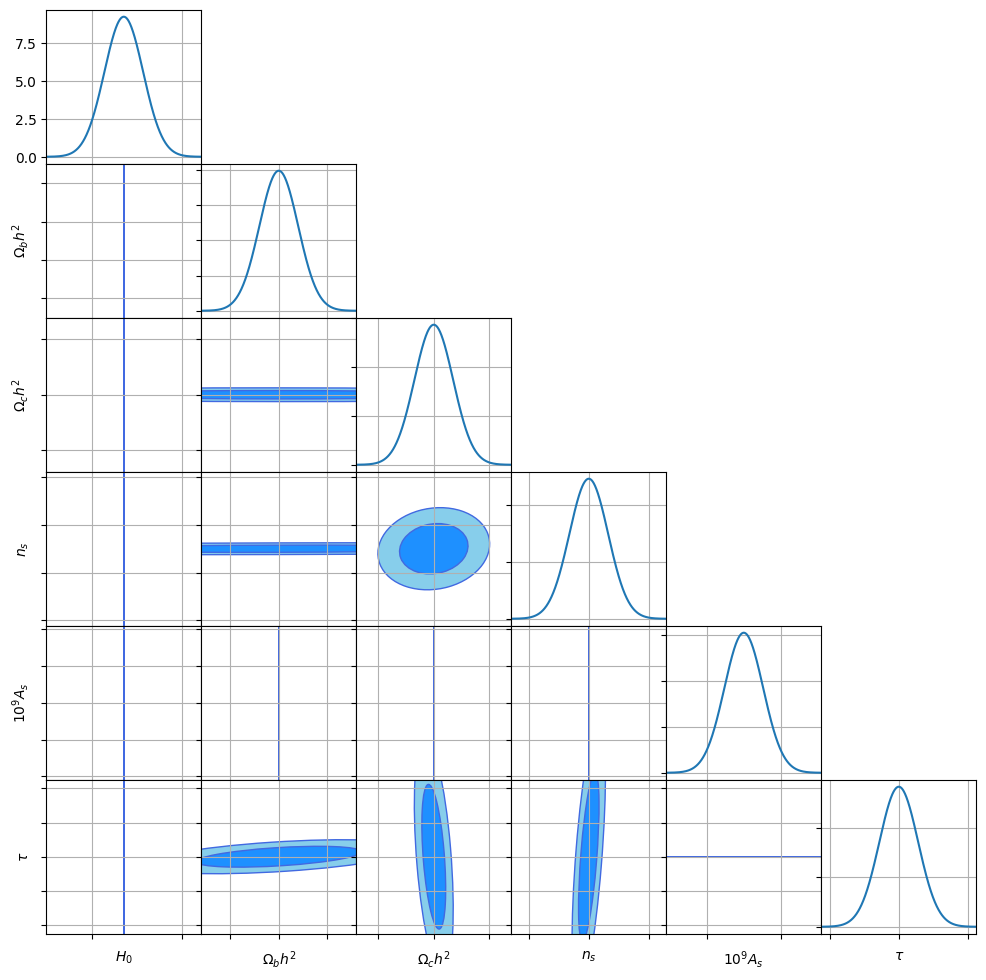

In [29]:
import matplotlib as mpl
from scipy.stats import norm
# Triangle Plot (Original skeleton code by Nicholas Kern)
# Only a suggestion. You can create your own if you wish.

fig, axes = plt.subplots(6,6,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9 A_s$',r'$\tau$'])

for i in range(6):
    for j in range(6):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            # diagonal part
            ax.grid(True)
            xarr = np.linspace(theta_best_Planck[i]-4*np.sqrt(covariance[i,i]), theta_best_Planck[i]+4*np.sqrt(covariance[i,i]), 1000)
            yarr = norm.pdf(xarr, theta_best_Planck[i], np.sqrt(covariance[i,i]))
            ax.plot(xarr, yarr)
            ax.set_xlim(theta_best_Planck[i]-4*np.sqrt(covariance[i,i]), theta_best_Planck[i]+4*np.sqrt(covariance[i,i]))
        else:
            # off-diagonal part
            ax.grid(True)

            # Covariance matrix
            CovM = np.array([[covariance[i,i], covariance[i,j]], [covariance[j,i], covariance[j,j]]])

            # Get eigenvalue/vector using svd
            eigvec, eigval, u = np.linalg.svd(CovM)

            # Get Semimajor/minor axes of the ellipse
            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            # Rotation angle of the ellipse
            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            # Create ellipses
            ell = mpl.patches.Ellipse(xy=[theta_best_Planck[j], theta_best_Planck[i]], width=1.52*semimaj, height=1.52*semimin, angle = theta*180/np.pi, facecolor = 'dodgerblue', edgecolor = 'royalblue', label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[theta_best_Planck[j], theta_best_Planck[i]], width=2.48*semimaj, height=2.48*semimin, angle = theta*180/np.pi, facecolor = 'skyblue', edgecolor = 'royalblue', label = '95% confidence')

            ax.add_patch(ell2)
            ax.add_patch(ell)

            ax.set_ylim(theta_best_Planck[i]-4*np.sqrt(covariance[i,i]), theta_best_Planck[i]+4*np.sqrt(covariance[i,i]))
            ax.set_xlim(theta_best_Planck[j]-4*np.sqrt(covariance[j,j]), theta_best_Planck[j]+4*np.sqrt(covariance[j,j]))


        if j != 0:
            ax.set_yticklabels([])
        if i != 5:
            ax.set_xticklabels([])
        if j == 0 and i !=0:
            ax.set_ylabel(p_tex[i], fontsize=10)
            ax.set_yticklabels([])
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if i == 5:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_xticklabels([])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]


Now, assume that we have an ideal, zero-noise CMB survey with $N_l = 0$. However, we are still instrinsically limited on the number of independent modes we can measure (there are only (2l+1) of them) - $C_l = \frac{1}{2l+1}\sum_{m=-l}^{l}\langle|a_{lm}|^2\rangle$. This leads that we get an instrinsic error (called "cosmic variance") in our estimate of $C_l$. So we approximate that <br><br> $$ (\sigma_l^{EE})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^{EE})^2,\ \ (\sigma_l^{TT})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}(D_l^{TT})^2,$$ <br> $$ (\sigma_l^{TE})^2 = \frac{2}{(2l+1) \cdot f_{sky} \cdot \Delta l}\frac{(D_l^{TE})^2 + D_l^{TT}D_l^{EE}}{2} $$.
<br><br>

<span style="color:blue"> <i> 3. First compute $\sigma_l$ for this zero-noise futuristic survey. (assuming $N_l^k = 0$) Repeat Part 1 and 2. (How well does a zero-noise CMB survey constrain the cosmologial parameters?) </i></span> <br>

In [ ]:
...


<span style="color:blue"><i> 4. Combine Part 2 and Part 3 and compare. (First plot your results from Part 2 (1-d and 2-d constraints using the Planck power spectra and noise. Then, plot Part 3 results (assuming zero noise) on top with different colors. Note that your 1-d constrains in Part 3 are more sharply peaked Gaussians (with much smaller variances), so you can scale them so that its peak amplitudes match with your results from Part 2.) </i></span><br>


In [ ]:
...


<span style="color:blue"><i> 5. Starting from the best-fit values from the Planck 2015 paper, you constrained six cosmological parameters assuming that you have a zero-noise future CMB survey. Compare your results with Table 3 and Figure 6 in https://arxiv.org/pdf/1502.01589v3.pdf. </i></span><br>


<span style="color:blue"> <i> Answer: </i></span><br><br>

***

#### Problem 2 - Solving the cocktail party problem with ICA

"Independent component analysis was originally developed to deal with problems that are closely related to the cocktail-party problem. The goal is to find a linear representation of nongaussian data so that the components are statistically independent, or as independent as possible. Such a representation seems to capture the essential structure of the data in many applications, including feature extraction and signal separation." More details on ICA can be found in https://www.cs.helsinki.fi/u/ahyvarin/papers/NN00new.pdf
<br>

In this problem, we take the mixed sounds and images, and apply ICA tn them to separate the sources.

<span style="color:blue"> <i> 1. Read the 3 sound files, and plot them as a function of time.  (In order to better see the features, you may plot them with some offsets.) </i></span> <br>

In [ ]:
from scipy.io import wavfile

In [ ]:
fs, data1 = wavfile.read('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound1.wav')
fs, data2 = wavfile.read('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound2.wav')
fs, data3 = wavfile.read('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound3.wav')
#fs is the sample rate, i.e., how many data points in one second.

data = np.float64(np.c_[data1, data2, data3])

In [ ]:
plt.figure(figsize = (10,7))

...

plt.xlabel('Time [second]')
plt.ylabel('Sound signal + offset')
plt.show()

<span style="color:blue"> <i> 2. Now run the following cells and play the sounds. </i></span> <br>

In [ ]:
from IPython.display import Audio

In [ ]:
Audio('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound1.wav')

In [ ]:
Audio('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound2.wav')

In [ ]:
Audio('/content/drive/My Drive/P188_288/P188_288_HW4/mix_sound3.wav')

You can tell there are 3 signals mixed in these sounds. You can consider these sounds as recorded by 3 different recorders that have different distrance to the 3 sources. In orther words,
<br><br>
\begin{equation}
 \bf X = A S + \mu \tag{1}
\end{equation}
<br><br>
where $\boldsymbol X$ is a vector of these 3 sounds, $\boldsymbol S$ is a vector of 3 signals, $\boldsymbol \mu$ is a vector of the mean of $\boldsymbol X$, and $\boldsymbol A$ is the mixing matrix.
<br><br>
Next, using the sklearn's fastICA module, we will separate the signals from these sounds.
<br><br>
(1) Define the fastICA model:

&nbsp; **ica = FastICA(algorithm='parallel')**

(2) Using "fit_transform," fit the model with the data and obtain the signals

&nbsp; **S = ica.fit_transform(data)**

<span style="color:blue"> <i> 3. Find the 3 signals in the sound files. Plot the signals. (Again, you may plot them with some offsets.)</i></span> <br>

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
...

In [ ]:
plt.figure(figsize = (10,7))

...

plt.xlabel('Time [second]')
plt.ylabel('Sound signal + offset')
plt.show()

You will find the amplitude of the signals is very small. This is because fastICA whitens the data first before applying ICA, so that the covariance matrix of the signals is I. We can amplify the signals by multiplying them with a large number.

<span style="color:blue"> <i> 4. Now let's save the signals as wav files and play the sounds. </i></span> <br>

In [ ]:
Amp = 1e6

wavfile.write('signal_sound1.wav', fs, np.int16(Amp*S[:,0]))
wavfile.write('signal_sound2.wav', fs, np.int16(Amp*S[:,1]))
wavfile.write('signal_sound3.wav', fs, np.int16(Amp*S[:,2]))

Play the sounds.

In [ ]:
...

In [ ]:
...

In [ ]:
...

Now we can reconstruct the mixed sounds with the signals. The mixing matrix is given by ica.mixing_, and the mean of the data is given by ica.mean_. Note that the $X$ and $S$ from equation (1) are matrices of shape (Nsignal, Nsample), but the data and the signal you get from FastICA are matrices of shape (Nsample, Nsignal).

<span style="color:blue"> <i> 5. Reconstruct the sounds from the source signal, and show that the reconstruct sounds is very close to the given sounds using np.allclose</i></span> <br>

In [ ]:
#mixing matrix
A = ...
mu = ...

X = ...

In [ ]:
print (np.allclose(X, data))

<span style="color:blue"> <i> 6. The ICA requires the data to be centered and whitened. The FastICA module from sklearn does the data centering and whitening automatically. Now let's disable the data preprocessing in FastICA by ica = FastICA(whiten=False), and then redo the analysis in part 3 and 4. Plot and play the sounds. Does ICA work without data preprocessing?</i></span> <br>

In [ ]:
...

In [ ]:
plt.figure(figsize = (10,7))

...

plt.xlabel('Time [second]')
plt.ylabel('Sound signal + offset')
plt.show()

Save the sounds.

In [ ]:
...

Play the sounds.

In [ ]:
...

In [ ]:
...

In [ ]:
...

<span style="color:blue"> <i> 7. The principal companent analysis (PCA) also tries to interpret the underlying structure of the data by decomposing the data into linear combinations of the principal components. Now let's apply PCA to the sounds and see if the signals are cleanly separated in the principal components. Plot the principal components, save them as wav files and play the sounds. How does it compares to Part 3 and 4? </i></span> <br>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
...

In [ ]:
plt.figure(figsize = (10,7))

...

plt.xlabel('Time [second]')
plt.ylabel('Sound signal + offset')
plt.show()

Save the sounds.

In [ ]:
...

Play the sounds.

In [ ]:
...

In [ ]:
...

In [ ]:
...

Now let's take a look at another example. Suppose now we have some linearly mixed images, and we are going to find the original photos with ICA. (This example is from https://github.com/vishwajeet97/Cocktail-Party-Problem)

<span style="color:blue"> <i> 8. Load in photos, and plot them. </i></span> <br>

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img1=mpimg.imread('/content/drive/My Drive/P188_288/P188_288_HW4/unos.jpg')
img2=mpimg.imread('/content/drive/My Drive/P188_288/P188_288_HW4/dos.jpg')
img3=mpimg.imread('/content/drive/My Drive/P188_288/P188_288_HW4/tres.jpg')

In [ ]:
...

The image is a 2D array. You will need to flatten the data for the following analysis.

<span style="color:blue"> <i> 9. Redo the analysis in part 3 and 4. Separate the original photos and plot them. Note that the sign of the signals recovered by ICA may not be correct, so you probably need to multiply the photos by -1. </i></span> <br>

In [ ]:
...

Plot the original photos.

In [ ]:
...

ICA algorithm tries to find the most non-Gaussian directions of given data. FastICA uses the KL divergence between the data and standard Gaussian (negentropy) to charactrize the non-Gaussianity. Another way to measure non-Gaussianity is to use the Wasserstein distance between the data and standard Gaussian. In 1D, the Wasserstein distance, also called earth mover's distance, has a closed form solution using Cumulative Distribution Function (CDF). Below we provide you the code for doing ICA using Wasserstein distance. The code searches for the most non-Gaussian directions by maximizing the Wasserstein distance between the data and Gaussian.

<span style="color:blue"> <i> 10. Perform ICA on the mixed photos from Q9 (do the following steps) </i></span> <br>

1. Whitens the data with sklearn.decomposition.PCA(whiten=True)
2. Run ICA with Wasserstein distance: $A$ = ICA_Wasserstein($X_{\mathrm{whiten}}$)
3. Recover the Signal S from the whitened data and mixing matrix $A$. Note that $\mu=0$ because of the whitening, and the shape of $X$ of equation (1) is (Nsignal, Nsample).
4. Plot the signals (original photos).

In [ ]:
import torch
import torch.optim as optim

def Percentile(input, percentiles):
    """
    Find the percentiles of a tensor along the last dimension.
    Adapted from https://github.com/aliutkus/torchpercentile/blob/master/torchpercentile/percentile.py
    """
    percentiles = percentiles.double()
    in_sorted, in_argsort = torch.sort(input, dim=-1)
    positions = percentiles * (input.shape[-1]-1) / 100
    floored = torch.floor(positions)
    ceiled = floored + 1
    ceiled[ceiled > input.shape[-1] - 1] = input.shape[-1] - 1
    weight_ceiled = positions-floored
    weight_floored = 1.0 - weight_ceiled
    d0 = in_sorted[..., floored.long()] * weight_floored
    d1 = in_sorted[..., ceiled.long()] * weight_ceiled
    result = d0+d1
    return result


def SlicedWassersteinDistanceG(x, pg, q, p, perdim=True):
    if q is None:
        px = torch.sort(x, dim=-1)[0]
    else:
        px = Percentile(x, q)

    if perdim:
        WD = torch.mean(torch.abs(px-pg) ** p)
    else:
        WD = torch.mean(torch.abs(px-pg) ** p, dim=-1)
    return WD


def SWD_prepare(Npercentile=100, device=torch.device("cuda:0"), gaussian=True):
    start = 50 / Npercentile
    end = 100-start
    q = torch.linspace(start, end, Npercentile, device=device)
    if gaussian:
        pg = 2**0.5 * torch.erfinv(2*q/100-1)
        return q, pg


def maxSWDdirection(x, x2='gaussian', n_component=None, maxiter=200, Npercentile=None, p=2, eps=1e-6):

    #if x2 is None, find the direction of max sliced Wasserstein distance between x and gaussian
    #if x2 is not None, find the direction of max sliced Wasserstein distance between x and x2

    if x2 != 'gaussian':
        assert x.shape[1] == x2.shape[1]
        if x2.shape[0] > x.shape[0]:
            x2 = x2[torch.randperm(x2.shape[0])][:x.shape[0]]
        elif x2.shape[0] < x.shape[0]:
            x = x[torch.randperm(x.shape[0])][:x2.shape[0]]

    ndim = x.shape[1]
    if n_component is None:
        n_component = ndim

    q = None
    if x2 == 'gaussian':
        if Npercentile is None:
            q, pg = SWD_prepare(len(x), device=x.device)
            q = None
        else:
            q, pg = SWD_prepare(Npercentile, device=x.device)
    elif Npercentile is not None:
        q = SWD_prepare(Npercentile, device=x.device, gaussian=False)


    #initialize w. algorithm from https://arxiv.org/pdf/math-ph/0609050.pdf
    wi = torch.randn(ndim, n_component, device=x.device)
    Q, R = torch.qr(wi)
    L = torch.sign(torch.diag(R))
    w = (Q * L).T

    lr = 0.1
    down_fac = 0.5
    up_fac = 1.5
    c = 0.5

    #algorithm from http://noodle.med.yale.edu/~hdtag/notes/steifel_notes.pdf
    #note that here w = X.T
    #use backtracking line search
    w1 = w.clone()
    w.requires_grad_(True)
    if x2 == 'gaussian':
        loss = -SlicedWassersteinDistanceG(w @ x.T, pg, q, p)
    else:
        loss = -SlicedWassersteinDistance(w @ x.T, w @ x2.T, q, p)
    loss1 = loss
    for i in range(maxiter):
        GT = torch.autograd.grad(loss, w)[0]
        w.requires_grad_(False)
        WT = w.T @ GT - GT.T @ w
        e = - w @ WT #dw/dlr
        m = torch.sum(GT * e) #dloss/dlr

        lr /= down_fac
        while loss1 > loss + c*m*lr:
            lr *= down_fac
            if 2*n_component < ndim:
                UT = torch.cat((GT, w), dim=0).double()
                V = torch.cat((w.T, -GT.T), dim=1).double()
                w1 = (w.double() - lr * w.double() @ V @ torch.pinverse(torch.eye(2*n_component, dtype=torch.double, device=x.device)+lr/2*UT@V) @ UT).to(torch.get_default_dtype())
            else:
                w1 = (w.double() @ (torch.eye(ndim, dtype=torch.double, device=x.device)-lr/2*WT.double()) @ torch.pinverse(torch.eye(ndim, dtype=torch.double, device=x.device)+lr/2*WT.double())).to(torch.get_default_dtype())

            w1.requires_grad_(True)
            if x2 == 'gaussian':
                loss1 = -SlicedWassersteinDistanceG(w1 @ x.T, pg, q, p)
            else:
                loss1 = -SlicedWassersteinDistance(w1 @ x.T, w1 @ x2.T, q, p)

        if torch.max(torch.abs(w1-w)) < eps:
            w = w1
            break

        lr *= up_fac
        loss = loss1
        w = w1
    if x2 == 'gaussian':
        WD = SlicedWassersteinDistanceG(w @ x.T, pg, q, p, perdim=False)
    else:
        WD = SlicedWassersteinDistance(w @ x.T, w @ x2.T, q, p, perdim=False)
    return w.T, WD**(1/p)

In [ ]:
def ICA_Wasserstein(x):

    A, WD = maxSWDdirection(torch.tensor(x, dtype=torch.float32))

    return A.detach().numpy()

In [ ]:
#load the data
...

In [ ]:
#Whiten the data
...

In [ ]:
#ICA
...

In [ ]:
#Recover S
...

Plot the original photos.

In [ ]:
...

***